[View in Colaboratory](https://colab.research.google.com/github/papasanimohansrinivas/Programming_Language_Detection/blob/added_further_set/Programming_Language_Detection_1.ipynb)

In [76]:
!git clone https://github.com/papasanimohansrinivas/Programming_Language_Detection.git -b added_further_set

Cloning into 'Programming_Language_Detection'...
remote: Counting objects: 27, done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 7), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [0]:
import pandas

In [0]:
rm -rf master

In [80]:
ls

complimentary_data_set.csv  Programming_Data.csv                  walkthedir.py
openCSV.py                  Programming_Language_Detection.ipynb


In [79]:
cd Programming_Language_Detection/

/content/Programming_Language_Detection


#### If you dont use header = None option initially loading into dataframe is going to be a headache 

In [0]:
t=pandas.read_csv("complimentary_data_set.csv",header=None)

In [0]:
t = t.sample(frac=1).reset_index(drop=True)

In [0]:
from collections import Counter

In [86]:
Counter(t['language'])

Counter({'bsh': 45,
         'coffee': 210,
         'cpp': 796,
         'java': 2376,
         'js': 3201,
         'npy': 29,
         'sh': 1121})

In [0]:
t.columns = ['code','language']

### Drop the nan rows from code columns 

#### reason i got nan into the csv is even mysterious to me ?


In [0]:
import numpy as np

In [0]:
t=t[t.code!=np.nan]

In [0]:
def tokenize_the_code(column):
  
  import re

  pattern = r"""[\w']+|[""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""\\]"""
  
  try:
    
    return re.findall(pattern,column)
  
  except TypeError:
    
    return ""

  

In [0]:
t['code']=t['code'].apply(tokenize_the_code)

In [0]:
t=t[t['code']!=""]

### know the length of the programs by ploting the length of the programs

In [0]:
program_lengths = pandas.DataFrame(map(len,t['code']))

In [98]:
program_lengths.mean()

0    1506.795057
dtype: float64

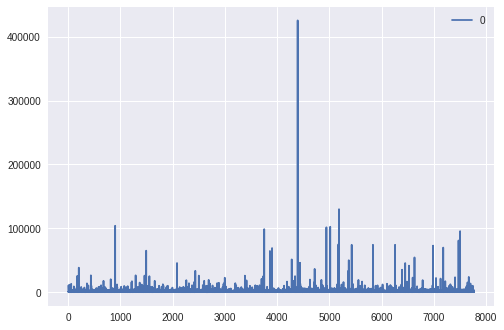

In [99]:
program_lengths.plot()

In [0]:
#@title Choose the programs when they have length of tokens are less than 400 issue is due to computing because when you categorical encode the featuresa are going over 150000 and the colab hangs !
new_t=t[t['code'].map(len)<=400]

In [0]:
program_leng = pandas.DataFrame(map(len,new_t['code']))

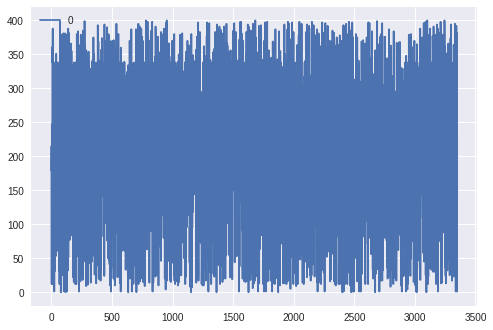

In [108]:
program_leng.plot()

In [0]:
df=pandas.DataFrame(map(np.array,new_t['code']))

In [0]:
from collections import Counter

In [110]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,/,*,(,C,),Copyright,$,{,year,},...,None,None,None,None,None,None,None,None,None,None
1,#,define,__STDC_FORMAT_MACROS,#,include,"""",THDTensor,.,h,"""",...,None,None,None,None,None,None,None,None,None,None
2,module,.,exports,=,require,(,',.,/,readable',...,None,None,None,None,None,None,None,None,None,None
3,module,.,exports,=,require,(,',.,/,functions',...,None,None,None,None,None,None,None,None,None,None
4,#,!,/,bin,/,sh,#,#,Licensed,to,...,None,None,None,None,None,None,None,None,None,None


In [0]:
modified_df = pandas.get_dummies(df, columns=df.columns)

In [113]:
modified_df.head()

,"0_""",0_#,0_$,0_'sue,0_'use,0_(,0_.,0_/,0_;,0_AnsiPainter,...,396_return,396_},397_;,397_false,397_target,397_},398_),398_},399_;,399_}
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(modified_df, new_t['language'], test_size=0.33, random_state=42)

In [0]:
#@title I used Decision Tree Classifier as a baseline 
from sklearn.tree import DecisionTreeClassifier

In [0]:
#@title criterion you can choose 'entrpoy' or 'gini' and i you have to experiment 
dt=DecisionTreeClassifier(criterion='entropy', splitter='best')

In [118]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
predictions = dt.predict(X_test)

In [0]:
def matchings(pred,test):
  
  count = 0
  
  for u,v in zip(pred,test):
    if u==v:
      count+=1
    else:
      print  u,v
  
  print "matched predictions {asd} out of {total} accuracy is {acc}".format(asd=count,total=len(test),acc=((count+0.0)*100/(len(test))))
      

In [121]:
#@title I am getting above 98 accuracy for both datasets and i want to test them on further datasets too and below i printed whenever there is misclassification but mostly they are true i.e sh can be bsh or coffee script can be javascript 
matchings(predictions,y_test)

java sh
js bsh
coffee js
sh java
cpp js
js cpp
sh java
java js
sh bsh
cpp java
java cpp
cpp js
sh coffee
bsh js
coffee js
cpp js
sh js
sh coffee
js coffee
matched predictions 1087 out of 1106 accuracy is 98.2820976492
